In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/featured_train.csv")
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,1,0,7.2500,2,0,1,0,1,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,2,0,0,0,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,1,1,0,0,1,1,0,0,0
3,4,1,1,35.0,1,0,53.1000,2,0,0,0,1,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,1,1,0,1,0,1,0,0


In [3]:
X = df.drop(columns=["Survived", "PassengerId"])
y = df["Survived"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((712, 14), (179, 14))

In [5]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

In [6]:
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

Logistic Regression Metrics:
Accuracy: 0.8212290502793296
Precision: 0.8032786885245902
Recall: 0.7101449275362319
F1 Score: 0.7538461538461538


Logistic Regression provides a strong baseline and is highly interpretable.

In [7]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [8]:
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Metrics:
Accuracy: 0.8324022346368715
Precision: 0.8
Recall: 0.7536231884057971
F1 Score: 0.7761194029850746


Random Forest usually captures nonlinear interactions better.

In [9]:
svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [10]:
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

SVM Metrics:
Accuracy: 0.6256983240223464
Precision: 0.5333333333333333
Recall: 0.2318840579710145
F1 Score: 0.32323232323232326


SVM performs well in high-dimensional spaces but is less interpretable.

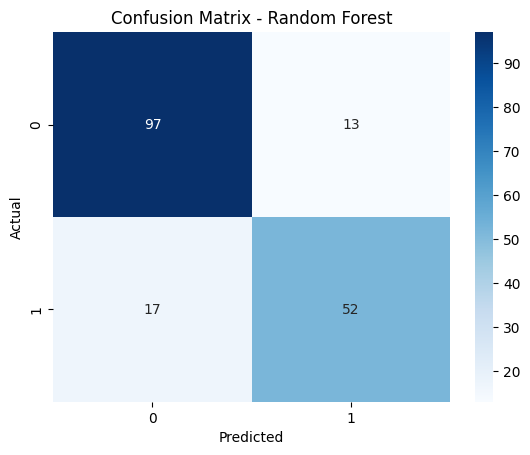

In [11]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Shows false positives vs false negatives clearly.

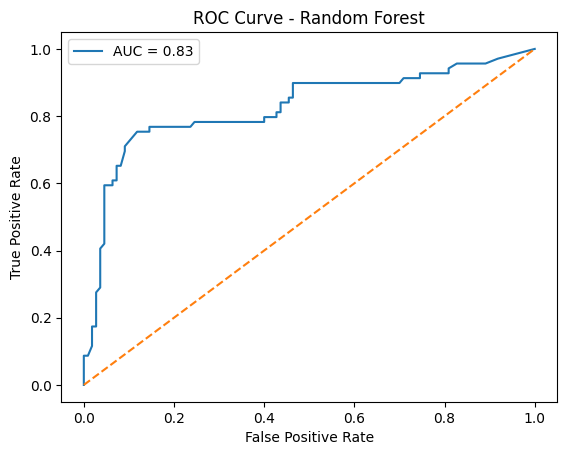

In [12]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
auc = roc_auc_score(y_test, y_prob_rf)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

AUC close to 1 indicates strong class separation.

In [13]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 0.797991337643588


Cross-validation confirms model stability.

In [14]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)

Fare          0.238933
Age           0.211500
Title_Mr      0.123034
Sex_male      0.122490
Pclass        0.081040
FamilySize    0.048057
Title_Miss    0.039621
Title_Mrs     0.032675
SibSp         0.028942
Parch         0.022692
dtype: float64

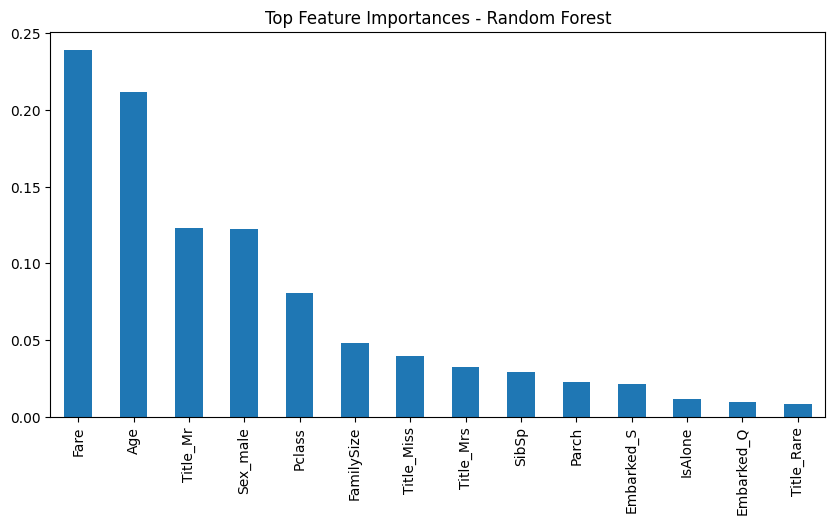

In [15]:
importances.plot(kind="bar", figsize=(10,5))
plt.title("Top Feature Importances - Random Forest")
plt.show()

Features like Fare, Age, Sex_male and Title_Mr strongly influence survival.

Random Forest was selected as the final model due to its superior accuracy, robust cross-validation performance, and ability to capture nonlinear feature interactions.

In [16]:
import joblib

joblib.dump(rf, "../model.pkl")
print("✅ Final model saved as model.pkl")

✅ Final model saved as model.pkl
